# 알고리즘 : K-means clustering
### 미션 : 데이터들을 비슷한 속성 끼리 분류하라.  
### 평가 지표 : 엘보우 기법, 실루엣 점수
### 문제 유형 : 비지도
### 문제 정의 : 쇼핑몰은 고객이 구매한 물품, 검색한 물품, 살펴본 물품 정보를 이용해서 고객에게 추천 서비스 제공. 혹은 연령대 에 따라 다른 추천을 할수 도 있지만, 더 다양한 데이터(변수)를 활용하여 다양한 방식으로 고객 그룹을 나눌 수도 있다. 100명의 고객 데이터 셋을 분석하여 적당한 수의 그룹으로 묶어보고, 그룹별 어떤 특성이 있는지 알아보자. 

비지도 학습
K-평균 군집화

학습 순서
1. 문제정의 -> 2. a.라이브러리 및 데이터 불러오기 , b. 엘보우 기법으로  최적의 K 값 구하기 -> 3. 데이터 확인하기 -> 4. 전처리: 피쳐 엔지니어링 -> 5. 데이터 모델링 및 실루엣 계수 -> 6. 예측 모델 결과 해석하기 -> 7. 이해하기 

정의 : 비지도 학습의 대표적인 알고리즘으로 목표 변수가 없는 상태에서 데이터를 비슷한 유형끼리 묶어내는 머신러닝. K-최근접 이웃 알고리즘과 비슷하게 거리 기반으로 작동하며 적절할 K값을 사용자가 지정해야함. 전체 그룹의 수는 사용자가 지정하는 K개.

장점 : 구현이 비교적 간단함, 클러스터링 결과를 쉽게 해석
단점 : 최적의 k값을 자동으로 찾지 못함. 사용자가 직접 선택해야함. 거리기반 알고리즘이기 떄문에, 변수의 스케일에 따라 다른 결과를 나타낼 수있다. 
유용한 곳 : 종속변수가 없는 데이터 셋에서 데이터 특성을 비교적 간단히 살펴볼수있음. 마케팅이나 제품 기획 등을 목적으로 한 고객 분류에 사용가능. 지도 학습에서 종속변수를 제외 하고 사용하면, 탐색적 자료 분석 혹은 피처 엔지니어링 용도로 사용. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://raw.githubusercontent.com/snkn1959/data_source/main/example_cluster.csv'
data = pd.read_csv(file_url)

In [5]:
data

,var_1,var_2
0,3.264413,6.929164
1,0.220814,2.251631
2,-8.786197,-8.333582
3,-0.008547,2.630791
4,4.912903,6.888520
...,...,...
995,4.678232,7.704404
996,5.250715,6.930948
997,-11.818752,-5.609853
998,0.613725,3.809334


<AxesSubplot: xlabel='var_1', ylabel='var_2'>

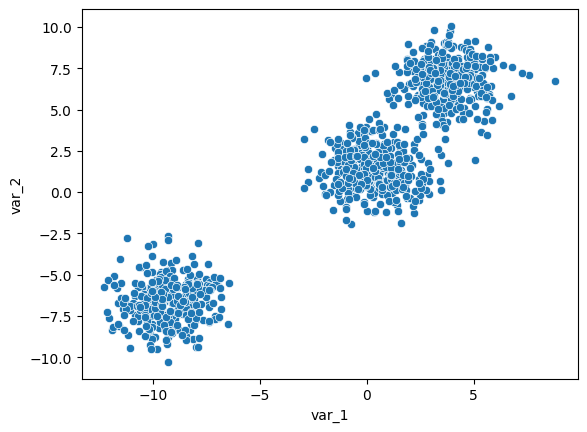

In [6]:
#산점도 그리기 (분포를 보기 위해)
sns.scatterplot(x='var_1', y= 'var_2', data = data)

연습용 데이터 모델링 및 평가

In [7]:
from sklearn.cluster import KMeans

In [8]:
#군집화 3
kmeans_model = KMeans(n_clusters=3, random_state = 100) 

In [9]:
kmeans_model.fit(data)

KMeans(n_clusters=3, random_state=100)

In [10]:
kmeans_model.predict(data)

array([1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2,

In [11]:
#예측값을 라벨로 저장
data["label"] = kmeans_model.predict(data)

<AxesSubplot: xlabel='var_1', ylabel='var_2'>

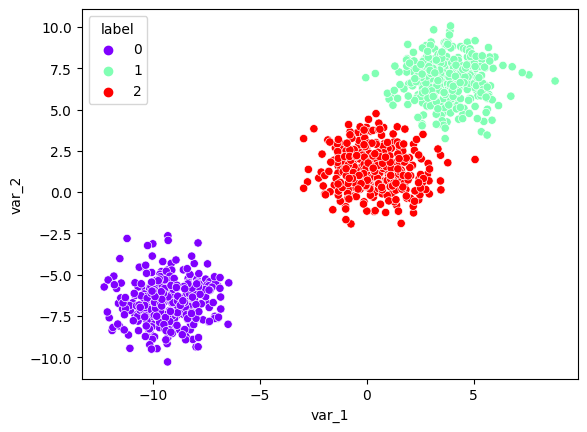

In [13]:
sns.scatterplot(x='var_1', y = 'var_2', data= data, hue = 'label', palette='rainbow')

엘보우 기법으로 최적의 K값 구하기

엘보우 기법 : 최적의 클러스터 개수를 확인하는 방법으로, 클러스터의 중점과 각 데이터 간의 거리를 기반으로 계산

이너셔 (inertia): 각 그룹에서의 중심과 각 그룹에 해당 하는 데이터 간의 거리에 대한 합

In [16]:
# 작을수록 그룹별로 더 잘 모여있어 분류가 잘되었을 것이다.
# 하지만 문제는, k값이 커지면 점수는 작아 질 수 밖에 없다. 그래서 엘보우로 적정 k값 결정
kmeans_model.inertia_

3090.033237076662

In [17]:
#다양한 K를 넣어 모델링 해보고 각가에 대한 이너셔를 구한 뒤, 적절한 K결정

distance = []
for k in range(2,10): #순회
    k_model = KMeans(n_clusters = k) #모델 객체 생성
    k_model.fit(data) #학습
    distance.append(k_model.inertia_) #이너셔를 리스트에 저장

In [18]:
distance #저장된 이너셔 확인

[9908.551424778394,
 3090.033237076662,
 2717.1008497620496,
 2395.839345817203,
 2061.244644405482,
 1821.0669351932734,
 1586.1433105529838,
 1377.2053322917225]

<AxesSubplot: >

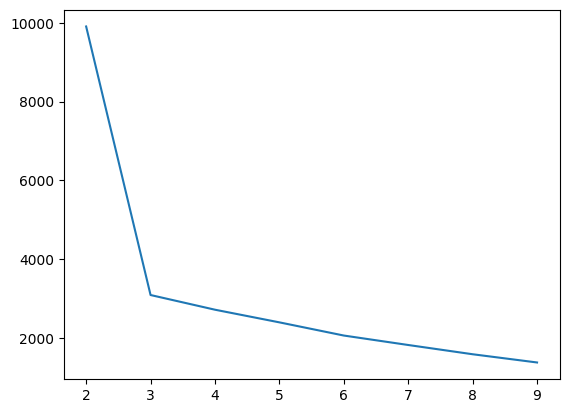

In [19]:
sns.lineplot(x=range(2,10), y=distance)
# distance 가 급격히 줄어드는 k값을 포착하여 최적 값 결정

## 실습 데이터

In [20]:
file_url = "https://raw.githubusercontent.com/musthave-ML10/data_source/main/customer.csv"
customer = pd.read_csv(file_url)

In [21]:
customer.head()
# 카드번호 / 범주 / 거래금액

,cc_num,category,amt
0,2703186189652095,misc,4.97
1,630423337322,grocery,107.23
2,38859492057661,entertainment,220.11
3,3534093764340240,gas_transport,45.00
4,375534208663984,misc,41.96


In [22]:
customer['cc_num'].nunique() 
# 총 100명

100

In [23]:
customer['category'].nunique()

11

## 피쳐 엔지니어링

In [25]:
customer_dummy = pd.get_dummies(customer, columns =['category'])
# 카테고리를 더미 변수로

In [26]:
customer_dummy.head()

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0,0,0,0,0,0,0,1,0,0,0
1,630423337322,107.23,0,0,0,1,0,0,0,0,0,0,0
2,38859492057661,220.11,1,0,0,0,0,0,0,0,0,0,0
3,3534093764340240,45.00,0,0,1,0,0,0,0,0,0,0,0
4,375534208663984,41.96,0,0,0,0,0,0,0,1,0,0,0


In [27]:
#범주별로 얼마만큼 금액을 썼는지 계산 (더미변수 곱하기 amt)

#우선 더미 변환된 변수들을 하나의 리스트로. 
#컬럼 이름을 불러오는 columns를 이용하여 cc_num과 amt를 제외하도록 인덱싱

cat_list = customer_dummy.columns[2:] #세번째 컬럼부터의 컬럼며을을 리스트로

In [29]:
for i in cat_list:
    customer_dummy[i] = customer_dummy[i] * customer_dummy['amt']
customer_dummy

,cc_num,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
0,2703186189652095,4.97,0.00,0.0,0.0,0.00,0.00,0.0,0.0,4.97,0.0,0.00,0.0
1,630423337322,107.23,0.00,0.0,0.0,107.23,0.00,0.0,0.0,0.00,0.0,0.00,0.0
2,38859492057661,220.11,220.11,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
3,3534093764340240,45.00,0.00,0.0,45.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0
4,375534208663984,41.96,0.00,0.0,0.0,0.00,0.00,0.0,0.0,41.96,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240449,4716561796955522,4.93,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,4.93,0.0
240450,30074693890476,140.12,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,140.12,0.0
240451,30404291151692,37.79,0.00,0.0,0.0,0.00,37.79,0.0,0.0,0.00,0.0,0.00,0.0
240452,4922710831011201,17.50,17.50,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0


In [30]:
#각 거래건의 데이터를 고객 레벨로 취합하는데 groupby()에 cc_num을 넣어주고 sum() --> 고객별 총 사용 금액 및 범주별 사용 금액
customer_agg = customer_dummy.groupby('cc_num').sum()
customer_agg.head()

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,48149.62,3169.74,4043.46,5076.36,7576.58,1631.22,5458.58,4924.97,4889.57,3135.25,8106.36,137.53
571365235126,259784.87,13864.51,9055.51,36525.79,48812.73,13685.60,19342.79,17726.82,32542.61,16672.08,45994.60,5561.83
571465035400,270081.63,16162.98,15448.75,9081.62,41643.82,15244.03,28282.98,13737.95,15880.82,8771.27,59454.96,46372.45
630412733309,41959.52,3212.46,1543.16,5786.98,8416.70,3201.04,2474.68,3648.97,3109.83,2592.17,7586.79,386.74
630423337322,244612.73,12786.75,6905.07,36460.40,43854.26,12136.74,21106.87,16807.24,32400.76,15885.32,44287.02,1982.30


In [31]:
#스케일링 해야한다. 
# K- 평균 군집화는 거리 기반이기 때문에 스케일링 영향 받음 
# 이번의 경우 StandardScaler() 사용

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #스케일러 객체 생성
scaled_df = pd.DataFrame(scaler.fit_transform(customer_agg), columns = customer_agg.columns, index= customer_agg.index) #스케일링 후 데이터프레임 화

In [32]:
scaled_df.head()
# 평균에 가까울수록 0에 근접, 더 많이 사용했으면 더 큰 양수, 더 적게 사용했으면 더 적은 음수 

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
cc_num,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796


고객 데이터 모델링 및 실루엣 계수

- 실루엣 계수 (silhouette coefficient) : 엘보우 기법과 같이 최적의 클러스터의 수를 찾는 방법으로, 엘보우 기법에 적절한 클러스터 수를 찾지 못했을 때 사용, 시간은 좀 더 걸림
- 엘보우 기법에서 사용되는 이너셔는 각 클러스터의 중심과 그 클러스터에 속한 데이터간의 거리로만 계산 되지만
- 실루엣은 클러스터 내부에서의 평균 거리와, 최근접합 다른 클러스터 데이터와의 평균 거리도 점수에 반영. 

<AxesSubplot: >

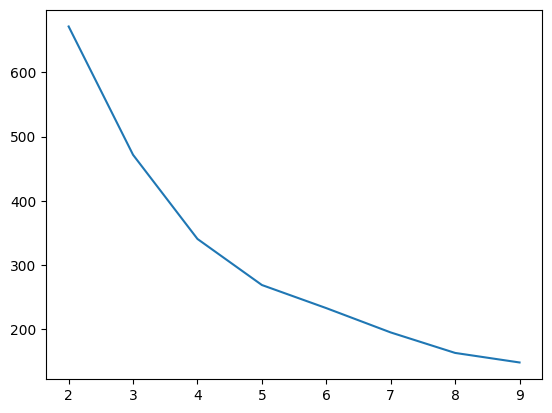

In [33]:
distance = []
for k in range(2,10):
    k_model= KMeans(n_clusters = k) #모델 객체 새성
    k_model.fit(scaled_df)#학습
    labels = k_model.predict(scaled_df) #예측
    distance.append(k_model.inertia_)#이너셔값 리스트에 추가

sns.lineplot(x=range(2,10), y = distance)

In [34]:
from IPython.display import Image

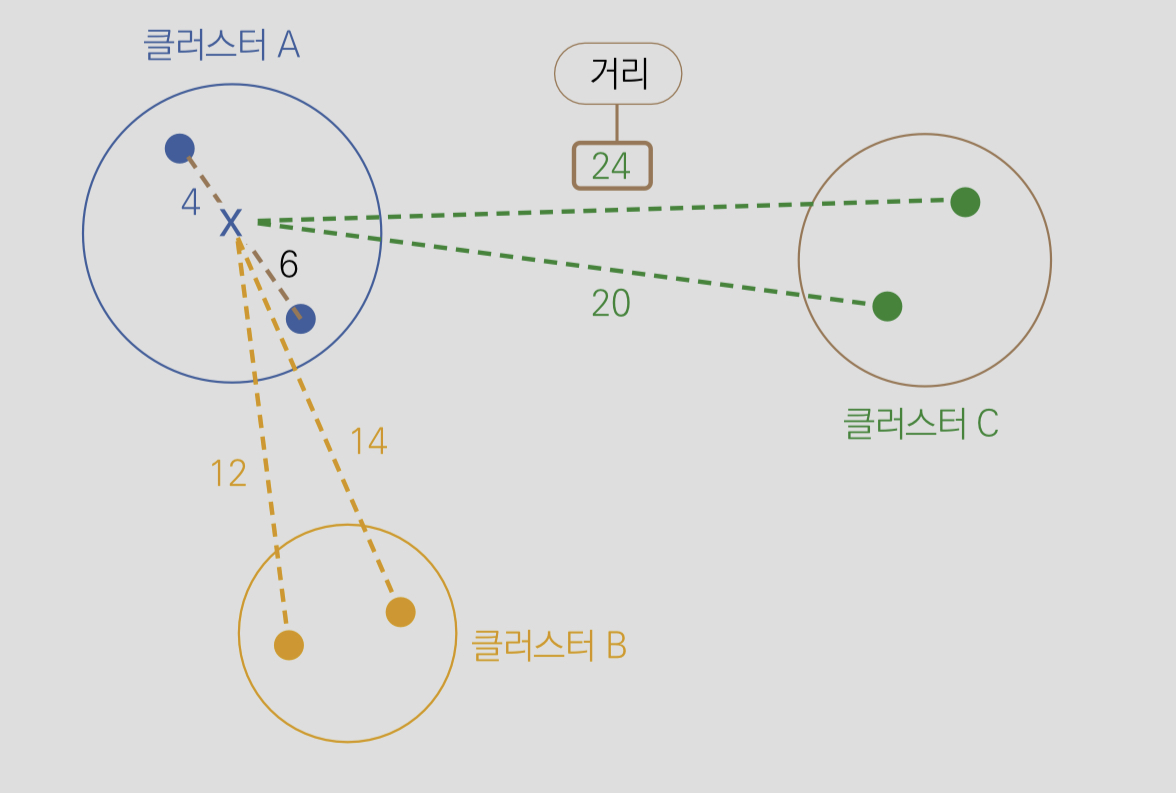

In [36]:
Image('images/18.jpeg')

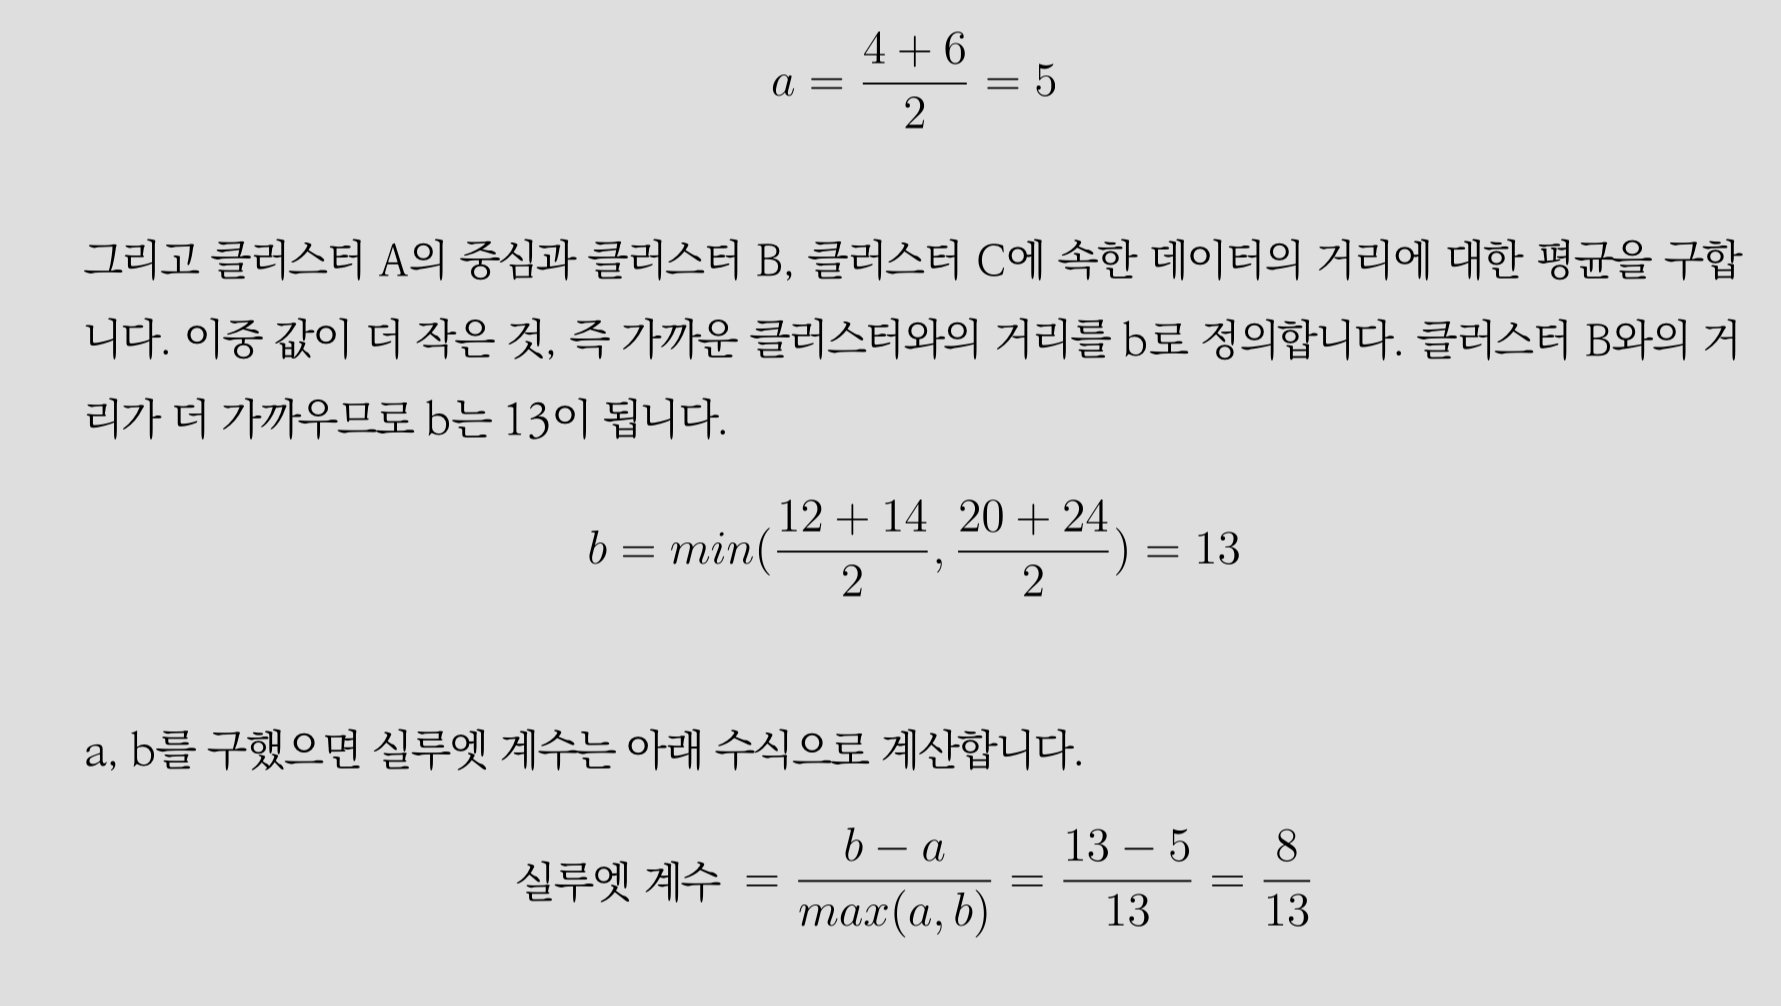

In [37]:
Image('images/19.jpeg')

In [38]:
from sklearn.metrics import silhouette_score 

In [39]:
silhouette = []
for k in range(2,10): #순회
    k_model= KMeans(n_clusters=k) #모델 객체 생성
    k_model.fit(scaled_df) #학습
    labels = k_model.predict(scaled_df) #예측
    silhouette.append(silhouette_score(scaled_df, labels)) 

#다양한 k값 넣어보고 이에 따른 실루엣 계수 리스트에 저장

<AxesSubplot: >

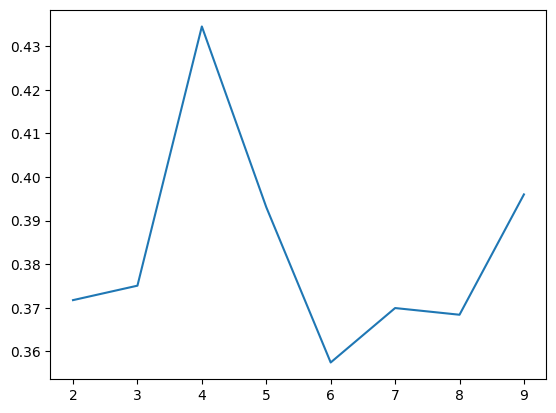

In [41]:
sns.lineplot(x=range(2,10), y=silhouette)

#실루엣 계수는 높을수록 좋은 분류

최종 예측 모델 및 결과 해석

In [42]:
k_model = KMeans(n_clusters=4) #모델 객체 생성
k_model.fit(scaled_df) #학습
labels = k_model.predict(scaled_df) #예측

In [43]:
scaled_df['label'] = labels

In [44]:
scaled_df

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,label
cc_num,,,,,,,,,,,,,
60495593109,-1.402327,-1.135617,-0.971069,-1.000180,-1.118217,-1.561756,-1.145051,-1.276913,-1.124693,-1.070260,-1.141424,-0.619930,0
571365235126,1.079407,0.414075,0.168880,2.090013,0.767268,1.040236,0.844969,1.127922,1.210503,1.807350,0.659967,-0.222587,3
571465035400,1.200151,0.747127,1.622968,-0.606627,0.439476,1.376630,2.126364,0.378610,-0.196523,0.127825,1.299938,2.766891,2
630412733309,-1.474915,-1.129427,-1.539741,-0.930355,-1.079803,-1.222903,-1.572733,-1.516610,-1.274986,-1.185705,-1.166127,-0.601675,0
630423337322,0.901491,0.257905,-0.320220,2.083588,0.540547,0.705908,1.097814,0.955178,1.198524,1.640103,0.578781,-0.484796,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512828414983801773,0.965514,0.426639,0.196184,2.086544,0.727562,0.725503,0.940589,1.923480,1.086851,1.810368,0.252344,-0.401038,3
4599735407877245080,-0.839991,-0.715988,0.394918,-0.398366,-0.721701,-1.263462,-0.576780,-0.190013,-0.818620,-0.286312,-0.940283,-0.504166,0
4666314527820883145,-1.107688,-0.926597,-1.190202,-1.342390,-0.850378,-1.073294,-1.011957,-1.616986,-1.182972,-0.974736,-0.664583,0.193335,0


In [54]:
#클러스터링 결과 해석 위해 라벨 별로 데이터 요약
scaled_df_mean = scaled_df.groupby('label').mean() 
scaled_df_count = scaled_df.groupby('label').count()['category_travel'] #트레블 말고 아무거나 써도됨
#모든 변수가 동일한 행을 가지고 있으니 하나만 불러주는 거임. 

In [55]:
scaled_df_mean

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel
label,,,,,,,,,,,,
0,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970
3,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840


In [56]:
#'category_travel' 만
scaled_df_count

label
0    36
1    10
2     8
3    46
Name: category_travel, dtype: int64

In [57]:
scaled_df_count = scaled_df_count.rename('count')

In [58]:
scaled_df_all = scaled_df_mean.join(scaled_df_count) #데이터 합치기

In [59]:
scaled_df_all

,amt,category_entertainment,category_food_dining,category_gas_transport,category_grocery,category_health_fitness,category_home,category_kids_pets,category_misc,category_personal_care,category_shopping,category_travel,count
label,,,,,,,,,,,,,
0,-0.983797,-0.826826,-0.820264,-0.807530,-0.746914,-1.037601,-0.943190,-1.017107,-0.788890,-0.903252,-0.760563,-0.266604,36
1,1.908120,2.155375,1.796299,-0.490418,2.290553,1.155923,0.943950,1.255997,2.005393,1.756210,2.272314,-0.262740,10
2,1.000533,0.776166,1.036432,-0.749213,0.310577,1.175961,1.794775,-0.011510,-0.311453,-0.093603,0.989477,3.050970,8
3,0.181113,0.043536,0.071197,0.868891,0.032581,0.356233,0.220808,0.524956,0.235603,0.341387,-0.070841,-0.264840,46


### 분석 결과
- 0, 3 클러스터가 지출 금액은 낮지만, 100명중 36+46 79명임. 
- VIP는 1클러스터 10명 이며,,,,, 엔터, 외식, 그로서리, 쇼핑 등 분야에서 소비가 타 클러스터 보다 높았음. 
- 가장 높은 점수 여행쪽에 2 클러스터가 높음

## 이해하기 : K-평균 군집화
- 각 클러스터의 중점과, 각 데이터와의 거리 기반으로. 


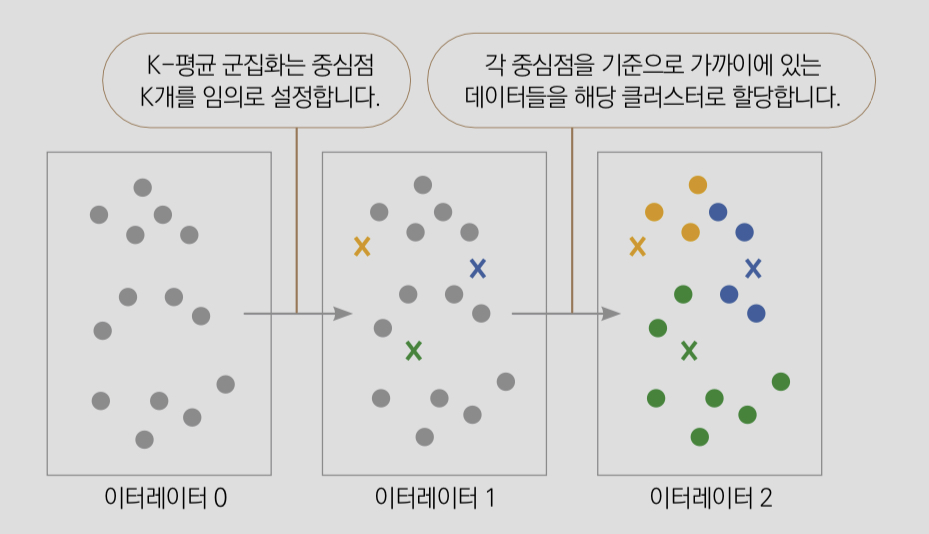

In [60]:
Image('images/20.jpeg')

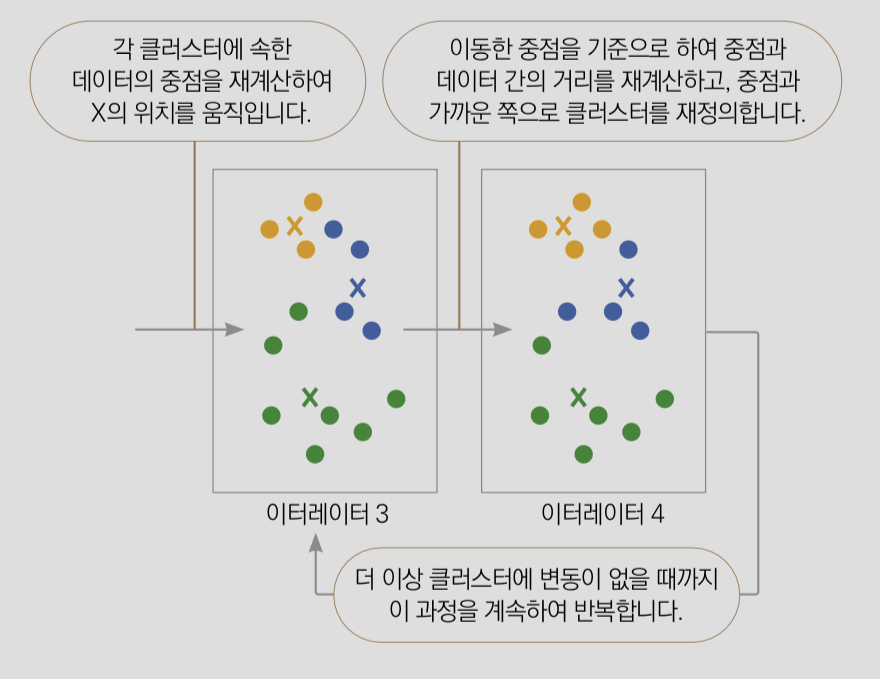

In [61]:
Image('images/21.jpeg')